In [24]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from equities_util import stock_data, stock_comp

In [25]:
stock = stock_data('SKLZ', '2020-05-01', '2023-02-10')

[*********************100%***********************]  1 of 1 completed


In [26]:
stock.info()

Ticker: SKLZ, start_date: 2020-05-01, end_date:2023-02-10


<AxesSubplot:xlabel='Date'>

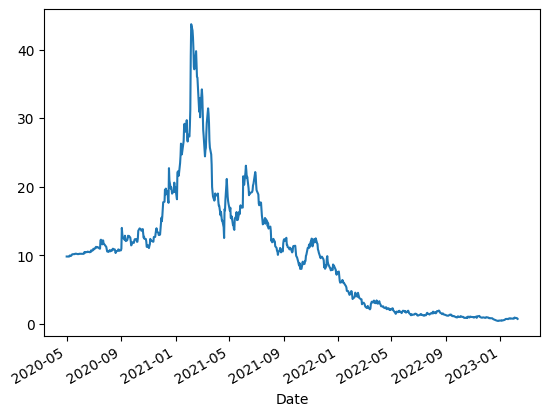

In [27]:
stock.data['Adj Close'].plot()

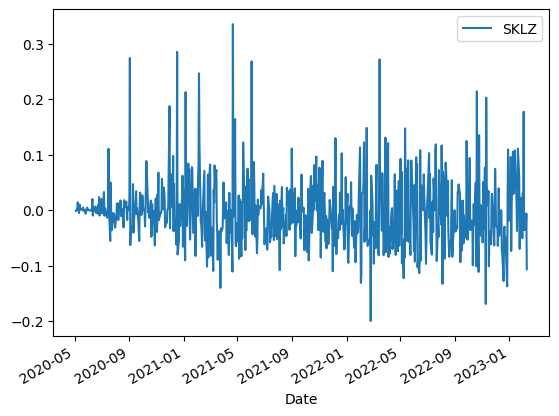

In [28]:
stock.plot_daily_returns()

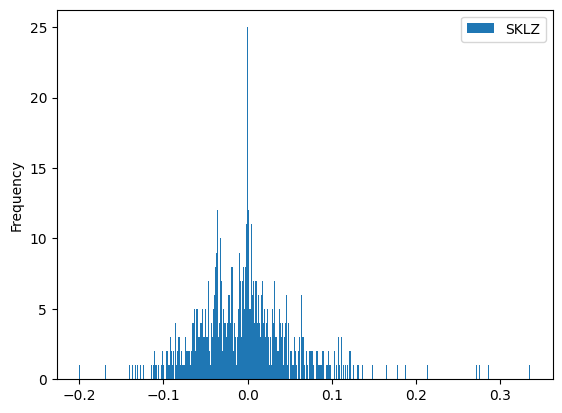

In [29]:
stock.plot_daily_returns(kind='hist', bins=500)

In [30]:
stock.get_sharpe_ratio()

-0.030631789473813117

In [31]:
stock.get_sharpe_ratio(daily=False)

-0.4862645829635735

In [9]:
stock.get_sortino_ratio(daily=False)

-0.928938952919146

In [10]:
stock.get_probabalistic_sharpe_ratio(daily=False)

1.070295180613456

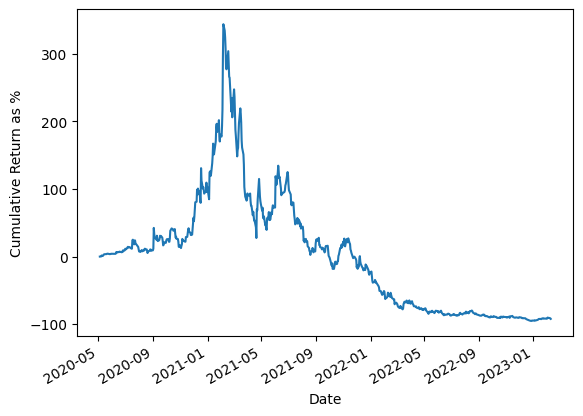

In [11]:
stock.plot_cumulative_daily_return_rate()

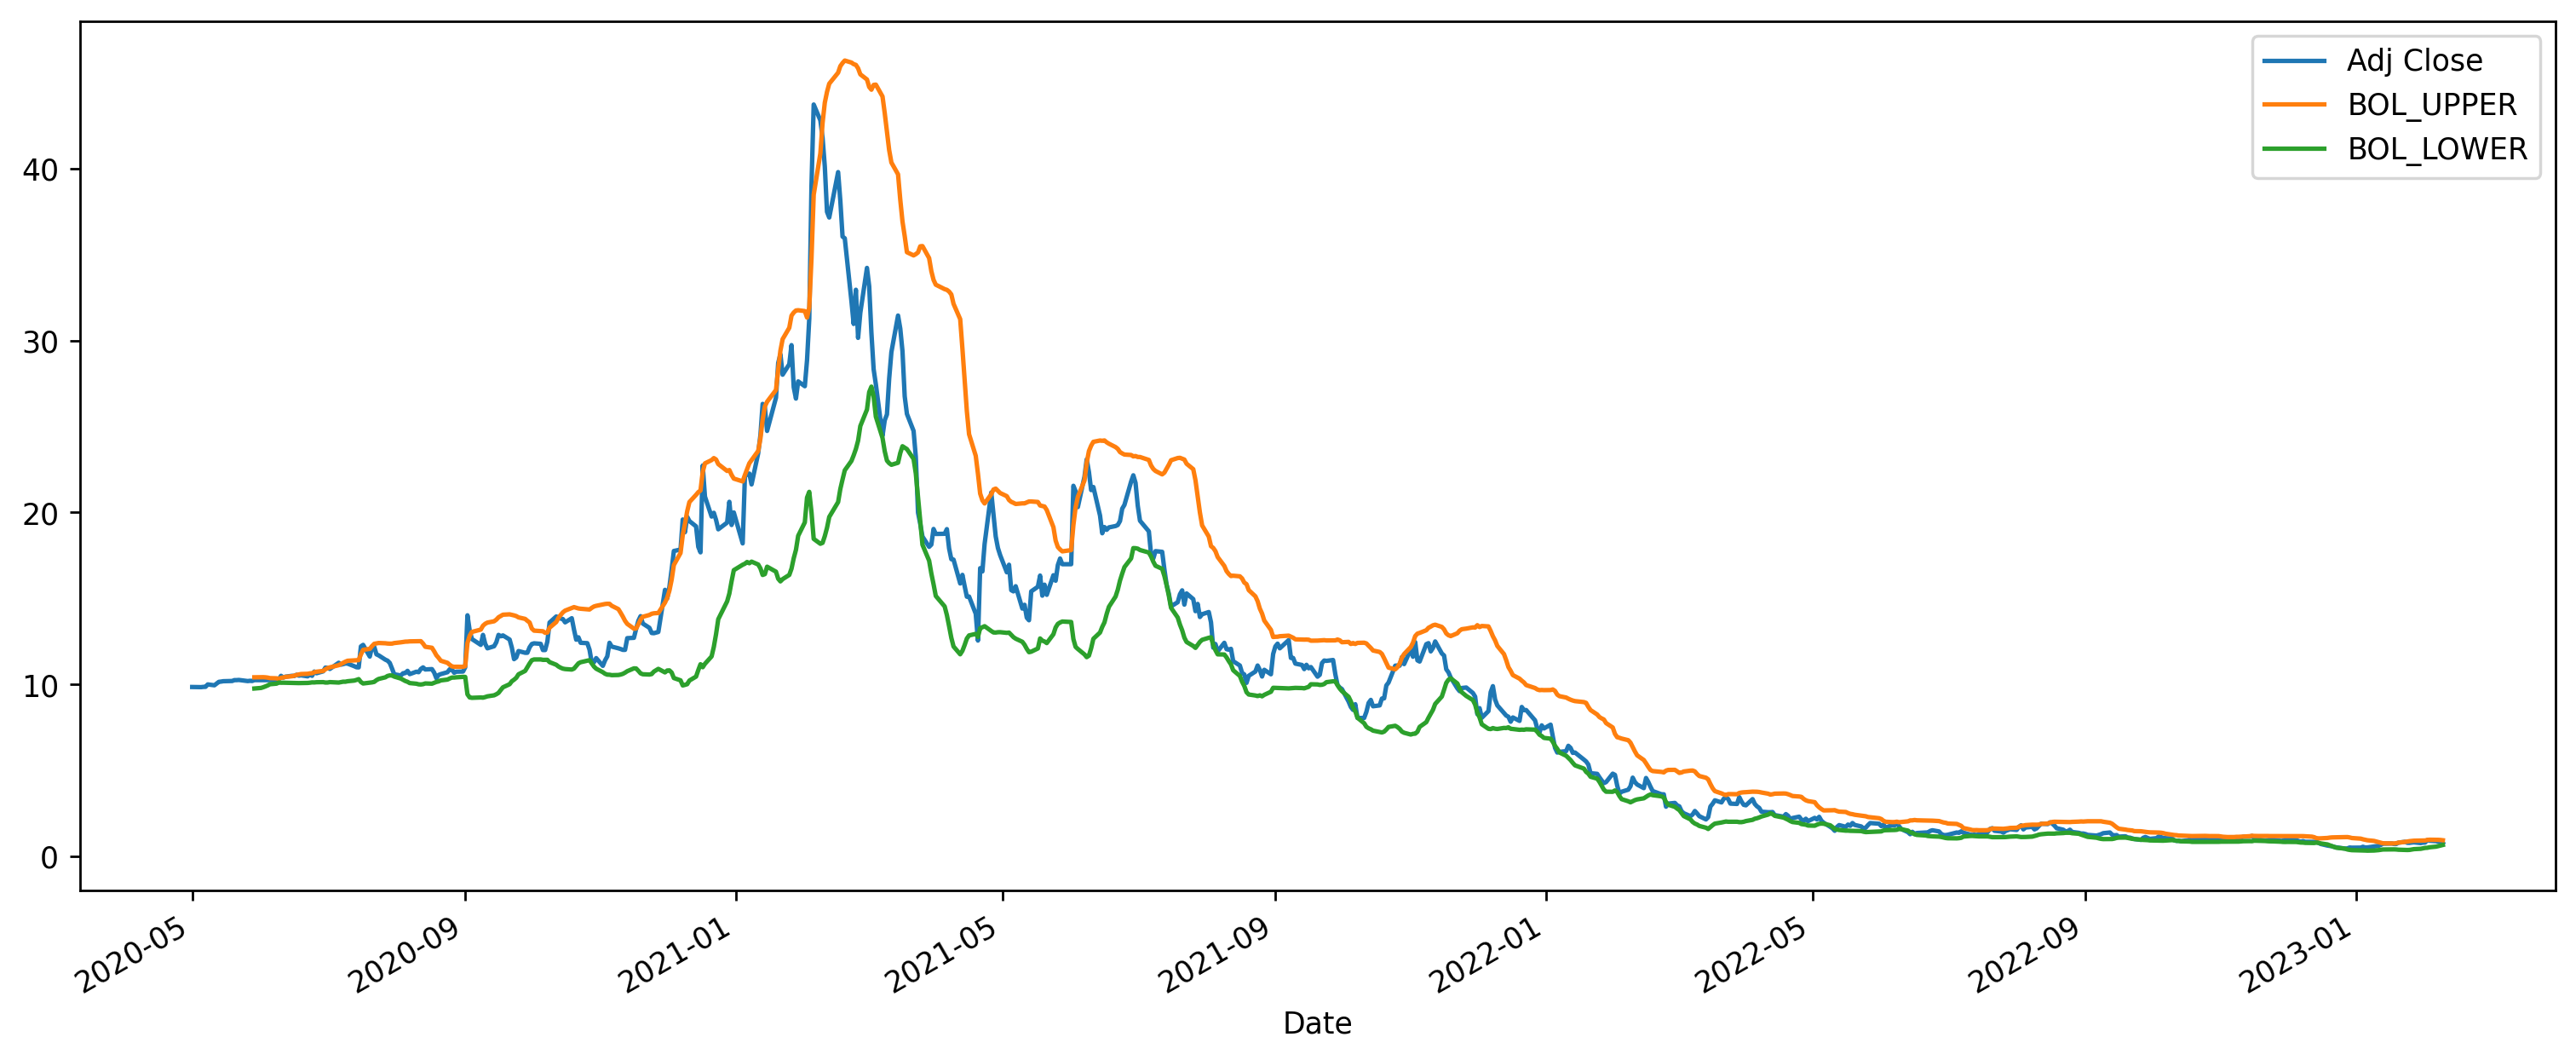

In [32]:
plt.figure(figsize=(15,6), dpi=250)
stock.plot_bollinger_bands(n=20)

In [47]:
tickers = ['AAPL', 'COST', 'TSLA', 'CRM', 'IBM']
start_date = '2019-01-01'
end_date = '2023-02-01'

comp = stock_comp(tickers, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [48]:
comp.get_ticker_dict()

{'AAPL': <equities_util.stock_data at 0x7fe3805c2610>,
 'COST': <equities_util.stock_data at 0x7fe3806976d0>,
 'TSLA': <equities_util.stock_data at 0x7fe37cbdc950>,
 'CRM': <equities_util.stock_data at 0x7fe388446110>,
 'IBM': <equities_util.stock_data at 0x7fe37cb6c910>}

In [49]:
comp.get_daily_returns().head()

,AAPL,COST,TSLA,CRM,IBM
Date,,,,,
2019-01-03,-0.099607,-0.021195,-0.031472,-0.037993,-0.019963
2019-01-04,0.042689,0.029039,0.057697,0.057976,0.039058
2019-01-07,-0.002226,0.003685,0.054361,0.030878,0.007075
2019-01-08,0.019063,0.007488,0.001164,0.024610,0.014219
2019-01-09,0.016982,0.006473,0.009483,0.001853,0.007177


<Figure size 2800x800 with 0 Axes>

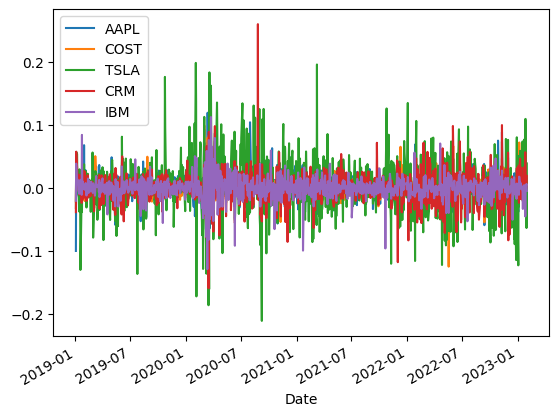

In [50]:
plt.figure(figsize =(14,4), dpi=200)
comp.plot_daily_returns(alpha=0.25)

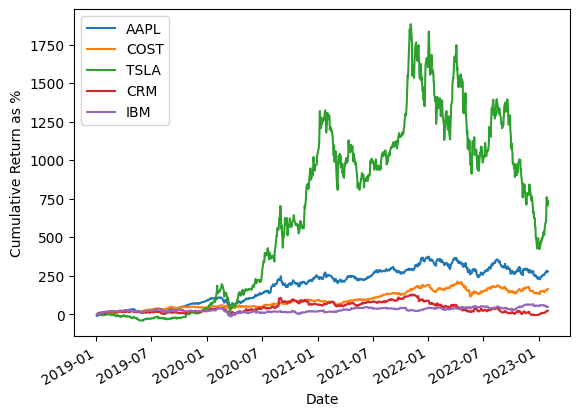

In [51]:
comp.plot_cumulative_daily_returns()

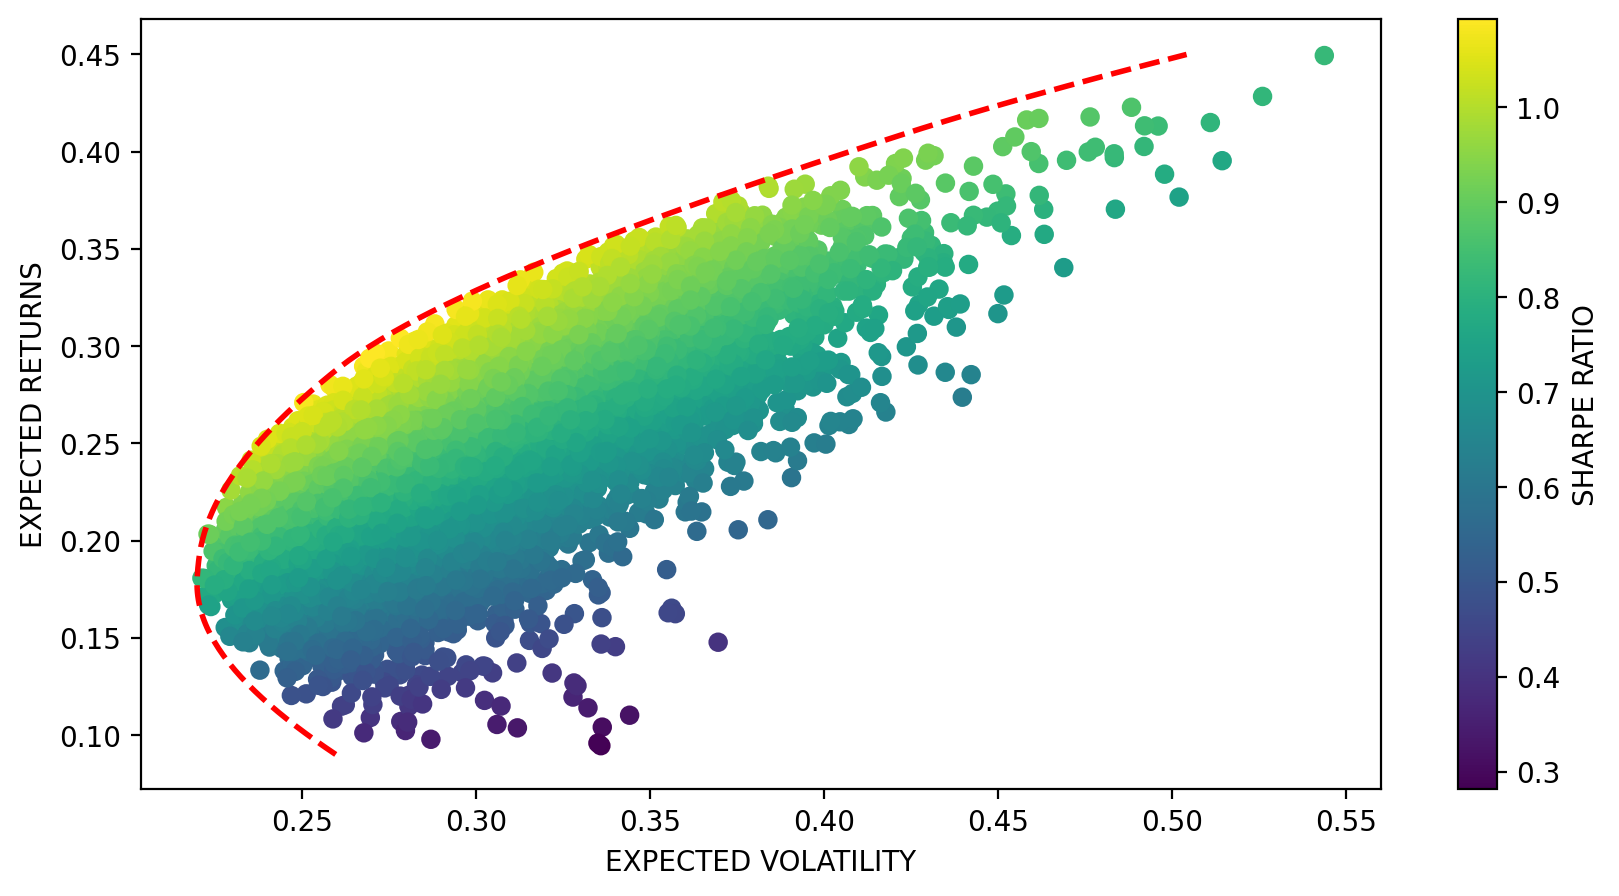

In [52]:
comp.run_monte_carlo_simulation(n_simulations = 10000, efficient_frontier=True)

In [53]:
optimal_weights = comp.minimization_search_optimal_weights()['x']
print(list(zip(comp.tickers, optimal_weights)))

[('AAPL', 0.2964360061035617), ('COST', 0.5746395671774203), ('TSLA', 0.12892442671901858), ('CRM', 0.0), ('IBM', 0.0)]
